# import library python and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta

#load data
df = pd.read_excel("XuLyDaukhi.xlsx")
# Set the date column as the index
df = df.set_index("Date")

# DRAWING RSI and EMA

Please type a stock code you want to display:PVO


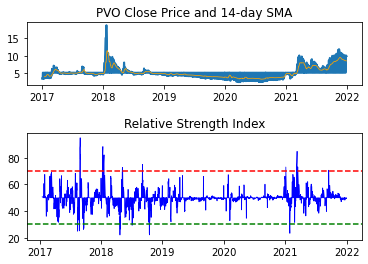

In [98]:
x=input("Please type a stock code you want to display:")

# Get the prices for the selected stock
prices = df[x]

# Calculate the SMA
sma = prices.rolling(window=14).mean()

# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 3, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 5, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(df[x], linewidth=2)
ax1.plot(sma, color='orange', linewidth=0.75)
ax1.set_title(x + ' Close Price and 14-day SMA')

# Plot the RSI
delta = prices.diff()
Gain = delta.where(delta > 0, 0)
Loss = -delta.where(delta < 0, 0)
avg_gain = Gain.rolling(14).mean()
avg_loss = Loss.rolling(14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
ax2.plot(rsi, color='blue', linewidth=0.75)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
ax2.set_title('Relative Strength Index')

plt.show()


# DRAWING EMA AND RSI

Please type a stock code you want to display:PVO


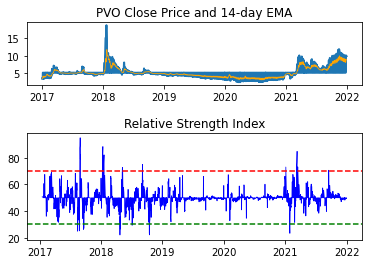

In [99]:

x=input("Please type a stock code you want to display:")


# Get the prices for the selected stock
prices = df[x]

# Calculate the EMA
ema = prices.ewm(span=14).mean()

# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 3, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 5, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(df[x], linewidth=2)
ax1.plot(ema, color='orange', linewidth=0.75)
ax1.set_title(x + ' Close Price and 14-day EMA')

# Plot the RSI
delta = prices.diff()
Gain = delta.where(delta > 0, 0)
Loss = -delta.where(delta < 0, 0)
avg_Gain = Gain.rolling(14).mean()
avg_loss = Loss.rolling(14).mean()
rs = avg_Gain / avg_loss
rsi = 100 - (100 / (1 + rs))
ax2.plot(rsi, color='blue', linewidth=0.75)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
ax2.set_title('Relative Strength Index')

plt.show()


# DRAWING MADC


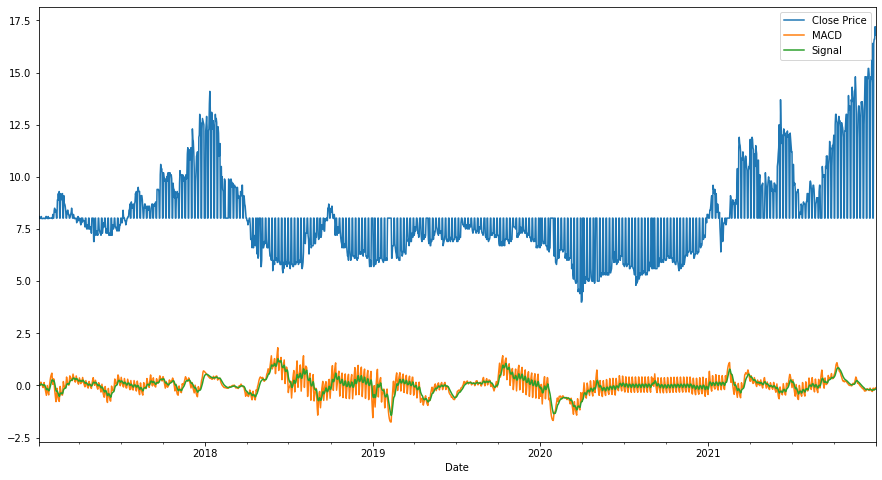

In [6]:


def calc_macd(close_price, fast_window=12, slow_window=26, signal_window=9):
    ema_fast = close_price.ewm(span=fast_window).mean()
    ema_slow = close_price.ewm(span=slow_window).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signal_window).mean()
    return macd, signal

def calc_ema(close_price, window):
    ema = close_price.ewm(span=window).mean()
    return ema

# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")




# Calculate MACD and EMA
macd, signal = calc_macd(df["PCG"])
ema_12 = calc_ema(df["PVC"], 12)
ema_26 = calc_ema(df["PVC"], 26)

# Plot the data
fig, ax = plt.subplots(figsize=(15, 8))
df["PVC"].plot(ax=ax, label="Close Price")

macd.plot(ax=ax, label="MACD")
signal.plot(ax=ax, label="Signal")
ax.legend()
plt.show()


# DRAWING RSI & SO

In [ ]:

x=input("Please type a stock code you want to display:")

# Calculate the RSI
delta = df[x].diff()
gain = delta.where(delta > 0, 0)
Loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = Loss.rolling(14).mean()
rs = avg_gain / avg_loss
RSI = 100 - (100 / (1 + rs))

# Calculate the Stochastic Oscillator
L = df[x].rolling(14).min()
H = df[x].rolling(14).max()
K = 100 * (df[x] - L) / (H - L)

# Plot the RSI and Stochastic Oscillator
plt.figure(figsize=(10,5))
plt.plot(RSI, label='RSI')
plt.plot(K, label='Stochastic Oscillator')
plt.legend()
plt.show()
